# Read C3D Export Text File

Read the exported file. Put into format for Pandas.

Want to create variables that can be easily looped through for the visual

Want to remove the VPython part so my computer doesnt work as hard


In [1]:
import csv #used for reading and parsing data from a text file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#get the empty rows
filename='clean_cmj.txt'
datafile = csv.reader(open(filename, 'r'), delimiter='\t')

counter = 0 #counter for number of rows
empty_rows = []
for row in datafile:
    if len(row)==0: #test for an empty row
        empty_rows.append(counter)    
    counter += 1
print(empty_rows)

[4, 272, 540, 2127]


In [3]:
# get position data
datafile = csv.reader(open(filename, 'r'), delimiter='\t')
counter = 0 #counter for number of rows
pos_header = []
pos_units = []
pos_direction = []
pos_data = []
for row in datafile:
    if counter==empty_rows[0]+1:
        pos_header.append(row)
    elif counter==empty_rows[0]+2:
        pos_units.append(row)
    elif counter==empty_rows[0]+3:
        pos_direction.append(row)
    elif counter>empty_rows[0]+3 and counter<empty_rows[1] :
        pos_data.append(row)
    elif counter>=empty_rows[1]:
        break
    counter = counter + 1
    


In [4]:
pos_head_unit = []
counter = 0
for i in range(len(pos_header[0])):
    if i == 0:
        head_plus_unit = pos_header[0][i]
        pos_head_unit.append(head_plus_unit)
    else:
        if counter == 0:
            head_plus_unit = pos_header[0][i] +  '_'  +   pos_direction[0][i]
            pos_head_unit.append(head_plus_unit) 
        else:
            head_plus_unit = pos_header[0][i-counter] +  '_'  + pos_direction[0][i] 
            pos_head_unit.append(head_plus_unit)    
            
        counter += 1
        if counter == 3:
            counter = 0
        
        


In [5]:
df = pd.DataFrame(pos_data, columns=pos_head_unit)
df

,Time,L.Trunk_X,L.Trunk_Y,L.Trunk_Z,R.Trunk_X,R.Trunk_Y,R.Trunk_Z,DistalTrunk_X,DistalTrunk_Y,DistalTrunk_Z,...,L.LateralToe_Z,L.Toe_X,L.Toe_Y,L.Toe_Z,L.MedialToe_X,L.MedialToe_Y,L.MedialToe_Z,Sternum_X,Sternum_Y,Sternum_Z
0,1.995,584.802,368.122,1463.72,696.778,344.382,1443.02,647.762,307.389,1364.7,...,85.8714,386.115,509.881,95.7099,417.272,503.429,94.0016,0,0,0
1,2,585.143,372.558,1462.87,697.174,348.385,1442.69,648.002,310.272,1364.99,...,85.9492,386.206,509.883,95.8073,417.338,503.441,94.1124,0,0,0
2,2.005,585.515,376.922,1462.07,697.522,352.641,1442.18,648.513,313.319,1364.93,...,86.0493,386.16,509.847,95.9013,417.415,503.433,94.2271,0,0,0
3,2.01,586.007,382.054,1460.43,697.966,357.039,1441.33,649.064,316.477,1364.79,...,86.1561,386.328,509.871,95.9938,417.491,503.432,94.3023,0,0,0
4,2.015,586.421,386.697,1459.07,698.611,361.568,1440.2,649.649,319.677,1364.42,...,86.2862,386.38,509.861,96.0884,417.565,503.441,94.4099,0,0,0
5,2.02,586.908,391.577,1457.38,699.211,366.154,1438.95,650.184,322.981,1363.86,...,86.0474,386.443,509.905,96.1865,417.651,503.478,94.5225,0,0,0
6,2.025,587.515,396.74,1455.17,699.901,371.103,1437.29,650.866,326.457,1363.02,...,86.5008,386.505,509.919,96.3133,417.769,503.488,94.5875,0,0,0
7,2.03,588.019,402.05,1452.65,700.525,376.198,1435.22,651.471,329.948,1361.98,...,86.5688,386.635,509.985,96.471,417.841,503.525,94.6839,0,0,0
8,2.035,588.618,407.375,1449.85,701.273,381.439,1432.85,652.124,333.662,1360.7,...,86.6611,386.799,510.075,96.5676,417.974,503.608,94.7524,0,0,0
9,2.04,589.246,413.162,1446.58,702.064,387.053,1429.77,652.88,337.315,1359.05,...,86.82,387.006,510.191,96.6573,418.111,503.666,94.8028,0,0,0


In [6]:
df = df.astype(float)

In [7]:
df.shape[1]
data = df.values
pos_data=data[:,1:-1]
pos_data.shape

(264, 119)

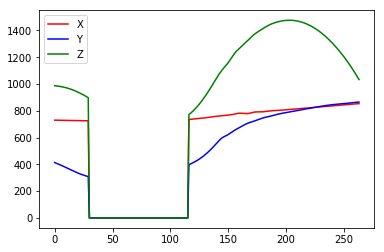

In [8]:
plt.plot(df['R.ASIS_X'], 'r', label = 'X')
plt.plot(df['R.ASIS_Y'], 'b', label = 'Y')
plt.plot(df['R.ASIS_Z'], 'g', label = 'Z')
plt.legend()
plt.show()

In [9]:
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
scene=canvas()
scene.width = 400
scene.height = 400
scene.background = color.black
x = 1000
y = 1000
z = 1000

#scene.center=vector(0, y , 0)
scene.camera.pos = vector(0, 0 ,0)
#scene.camera.axis = vector(0, 0, 0)



arrow(pos=vec(0,0,0), axis = vec(500,0,0), color=color.green)
arrow(pos=vec(0,0,0), axis = vec(0,500,0), color=color.red)
arrow(pos=vec(0,0,0), axis = vec(0,0,500), color=color.blue)


balls = []

i = 0
for i in range(pos_data.shape[1]-2):
    
    if i % 3==0:
        ball = sphere(pos=vec(pos_data[0,i],pos_data[0,i+2],pos_data[0,i+1]), radius=20, color=color.orange, make_trail = False, visible = True)
        balls.append(ball)

    i = i +1

    
    
    
k = 0
j = 1

while j < (len(balls)):
    rate(100)
    
    for k in range(pos_data.shape[1]-2):
        
        if k % 3==0:
            
            if pos_data[j,k] != 0:
                balls[j] = pos = vec(pos_data[j,k],pos_data[j,k+2], pos_data[j,k+1])
            else:
                balls[j] = visible = False
            
        k = k + 1
    j = j + 1    


<IPython.core.display.Javascript object>

In [44]:
len(balls)

39

In [13]:
j

39

In [51]:
pos_data

array([[ 584.802 ,  368.122 , 1463.72  , ...,   94.0016,    0.    ,
           0.    ],
       [ 585.143 ,  372.558 , 1462.87  , ...,   94.1124,    0.    ,
           0.    ],
       [ 585.515 ,  376.922 , 1462.07  , ...,   94.2271,    0.    ,
           0.    ],
       ...,
       [ 669.984 ,  581.736 , 1445.62  , ...,   91.4326,    0.    ,
           0.    ],
       [ 670.2   ,  582.872 , 1431.    , ...,   89.5478,    0.    ,
           0.    ],
       [ 670.471 ,  584.059 , 1416.15  , ...,   89.8715,    0.    ,
           0.    ]])